# Asymptotic Concentration of Volume in Hypercubes

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [23]:
def draw_histogram(n, epsilon=0.01):
    
    ax.clear()
    
    # Fix the axis for clearer effect
    ax.set_xlim([0.53, 0.63])
    ax.set_ylim([0, 50])
    
    # Title
    ax.text(0, 1.025, 'Asymptotic Concentration of Volume in Hypercubes',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    # Author
    ax.text(0.99, 0.945, '@delacruz', transform=ax.transAxes, ha='right',
            color='#777777', size = 25, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    ## Sampling and recording magnitudes
    
    points_distance = []

    for i in range(10**4):
        # Randomly sample a point from the n-Cube
        point = np.random.uniform(-1,1,n)
        # Compute its magnitude
        distance = np.linalg.norm(point)
        # Record this magnitude
        points_distance.append(distance)
        
    # Computes the proportion that falls inside epsilon band
    count = 0
    for point in points_distance:
        if (1-epsilon)*(n/3)**0.5 < point <(1+epsilon)*(n/3)**0.5:
            count += 1
    
    points_distance = [point / (n**0.5) for point in points_distance]

    # Visualise the data into a histogram
    ax.hist(points_distance, bins = 50, density = True, color='indigo')

    # Plot the boundaries of the epsilon band
    ax.axvline((1-epsilon)*(1/3)**0.5, linestyle = '--', color = 'gold')
    ax.axvline((1+epsilon)*(1/3)**0.5, linestyle = '--', color = 'gold')
    
    # Tells us what dimension we are in
    ax.text(0.88, 0.75, f'n={n}', transform=ax.transAxes, color='#777777', size=40, ha='right', weight=800)
    
    # Tell us how many points are inside the epsilon band
    ax.text(0.91, 0.7, f'Concentration={100 * count / len(points_distance)}%', transform=ax.transAxes, 
            color='#777777', size=15, ha='right', weight=800)

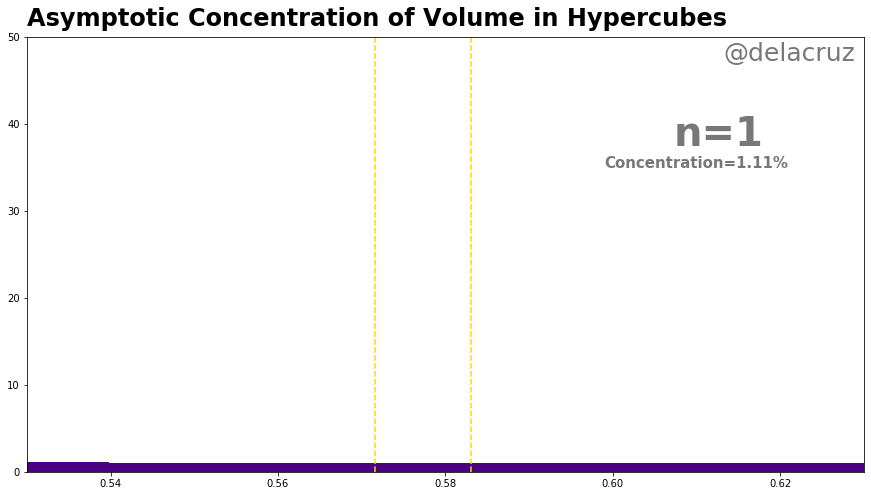

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_histogram, frames=range(1,10,5)) 

In [ ]:
HTML(animator.to_jshtml())